In [6]:
import pandas as pd
import numpy as np
import os as os

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read data

In [8]:
path_project = '/content/drive/MyDrive/Mejora_la_red_de_bici_Madrid/data_adquisition_gsm_api/data_augmentation/black_and_white/img_segmentation/'
file_name = 'img_segmentation_all.csv'

df_data = pd.read_csv(os.path.join(path_project, file_name), sep = ',')

In [9]:
df_data.head()

,building,vegetation,person,rider,motorcycle,road,car,bicycle,truck,sidewalk,traffic light,pole,fence,wall,sky,traffic sign,terrain,bus,train,cyclist_type
0,55.724854,2.377441,5.641846,1.298584,3.887451,24.094971,6.763916,0.084717,0.005615,0.120605,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Itinerario recomendado
1,51.105713,0.071045,0.002930,0.213623,0.233643,42.218018,1.957764,0.362061,2.146729,1.207764,0.002686,0.111572,0.364502,0.001953,0.000000,0.000000,0.0,0.0,0.0,Itinerario recomendado
2,23.980713,15.246338,1.351318,0.437500,1.936523,50.536865,0.186768,0.360596,0.000000,4.896240,0.000000,0.668213,0.000732,0.000000,0.398193,0.000000,0.0,0.0,0.0,Itinerario recomendado
3,53.099609,5.319580,1.821045,0.104248,3.100586,31.401611,0.136475,0.086426,0.213379,3.662109,0.001465,0.400391,0.000000,0.000000,0.000000,0.653076,0.0,0.0,0.0,Itinerario recomendado
4,44.725830,9.383301,0.259766,0.256104,1.281494,41.002930,2.161377,0.438721,0.000000,0.367920,0.000977,0.120605,0.000000,0.000000,0.000977,0.000000,0.0,0.0,0.0,Itinerario recomendado


# Analysis data

In [10]:
df_analysis = df_data.copy()
ls_cyclist_type = df_analysis['cyclist_type'].unique()
print(ls_cyclist_type)

['Itinerario recomendado' 'Ciclocarril+carril bus' 'Ciclocarril'
 'Carril bici unidireccional en calzada' 'Calle 20'
 'Senda peatonal ciclable']


In [11]:
# Target is cyclist_type, that is a categorical variable, so, we assign a int to each feature
dict_cyclist_type = {'Itinerario recomendado': 1,
                     'Senda peatonal ciclable': 0,
                     'Ciclocarril': 1,
                     'Carril bici unidireccional en calzada': 0,
                     'Ciclocarril+carril bus': 0,
                     'Calle 20': 0
                     }

df_analysis = df_analysis.rename(columns = {'cyclist_type':'cyclist_type_str'})
df_analysis['cyclist_type'] = df_analysis['cyclist_type_str'].apply(lambda row: dict_cyclist_type[row])
df_analysis.head()

,building,vegetation,person,rider,motorcycle,road,car,bicycle,truck,sidewalk,...,pole,fence,wall,sky,traffic sign,terrain,bus,train,cyclist_type_str,cyclist_type
0,55.724854,2.377441,5.641846,1.298584,3.887451,24.094971,6.763916,0.084717,0.005615,0.120605,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,Itinerario recomendado,1
1,51.105713,0.071045,0.002930,0.213623,0.233643,42.218018,1.957764,0.362061,2.146729,1.207764,...,0.111572,0.364502,0.001953,0.000000,0.000000,0.0,0.0,0.0,Itinerario recomendado,1
2,23.980713,15.246338,1.351318,0.437500,1.936523,50.536865,0.186768,0.360596,0.000000,4.896240,...,0.668213,0.000732,0.000000,0.398193,0.000000,0.0,0.0,0.0,Itinerario recomendado,1
3,53.099609,5.319580,1.821045,0.104248,3.100586,31.401611,0.136475,0.086426,0.213379,3.662109,...,0.400391,0.000000,0.000000,0.000000,0.653076,0.0,0.0,0.0,Itinerario recomendado,1
4,44.725830,9.383301,0.259766,0.256104,1.281494,41.002930,2.161377,0.438721,0.000000,0.367920,...,0.120605,0.000000,0.000000,0.000977,0.000000,0.0,0.0,0.0,Itinerario recomendado,1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


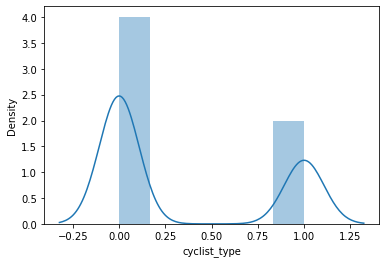

In [12]:
# Plot cyclist_type in order to analyse the distribution
import seaborn as sns
sns.distplot(df_analysis['cyclist_type']);

# Define validation, train and test sets

In [13]:
# Configuration set
dict_set = {'pct_validation_set': 0.15,
            'SEED': 42,
            'test_size': 0.20
            }

In [14]:
# Labels are the values we want to predict
str_predict = 'cyclist_type'
labels_original = np.array(df_analysis[str_predict])
# Remove the labels from the features
features_original = df_analysis.drop([str_predict,'cyclist_type_str'], axis = 1)

In [15]:
# Analyse features to use in the classfication models
features_original.describe().T

,count,mean,std,min,25%,50%,75%,max
building,1608.0,59.076823,19.919411,0.992432,45.475647,60.177734,74.054321,99.369629
vegetation,1608.0,4.858721,6.481546,0.000000,0.209839,2.147949,6.835632,43.598145
person,1608.0,2.041578,3.368706,0.000000,0.185669,0.805420,2.375977,35.731689
rider,1608.0,0.192117,0.476158,0.000000,0.000244,0.026978,0.171448,7.851563
motorcycle,1608.0,0.844395,1.631374,0.000000,0.028259,0.278198,0.919006,16.088867
road,1608.0,24.573638,14.984893,0.000000,13.431885,22.753540,34.950317,98.997314
car,1608.0,2.189474,3.562245,0.000000,0.116821,0.866333,2.675415,39.337402
bicycle,1608.0,0.163545,0.332050,0.000000,0.001953,0.041992,0.188599,4.079102
truck,1608.0,1.238154,4.069169,0.000000,0.000000,0.057617,0.697266,57.101562
sidewalk,1608.0,1.989405,2.214342,0.000000,0.458557,1.281006,2.789917,22.529297


In [16]:
ls_features_analysis = features_original.columns.to_list()

## Validation set

In [17]:
# Define validation set according to the lenght of the data
n_validation_set = int(len(labels_original)*dict_set['pct_validation_set'])
y_validation = labels_original[0:n_validation_set]
X_validation = features_original.iloc[0:n_validation_set,:]
print('Validation Features Shape:', X_validation.shape)
print('Validation Labels Shape:', y_validation.shape)

Validation Features Shape: (241, 19)
Validation Labels Shape: (241,)


## Train and test sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Select set without validation set
features = features_original.iloc[n_validation_set:,:]
labels = labels_original[n_validation_set:]
# Saving feature names for later use
feature_list = list(features.columns)
# Convert to numpy array
features = np.array(features)

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = dict_set['test_size'], random_state = dict_set['SEED'])

X_train = train_features
X_test = test_features
y_train = train_labels
y_test = test_labels

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (1093, 19)
Training Labels Shape: (1093,)
Testing Features Shape: (274, 19)
Testing Labels Shape: (274,)


# Analysis classification models

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

def analysis_model(model_name : str, model_predict: np.array, test_model: np.array):
  '''
  Given a prediction model and test model, 
    - accuracy:
    - correlation: pearson correlation
    - mdape: it is the Median Absolute Percentage Error. It is an error metric used to measure the performance of regression machine learning models.
             It is useful error metric, however there are upsides and downsides to using it in your solution.
    - confusion_matrix: it is used to evaluate the accuracy of a classification. Thus in binary classification, the count of true negatives, 
                        false negatives, true positives and false positives. 
    - classification report:
   are calculated
  '''
  print(model_name)
  print('-------------------------------------------------------------')
  
  # Accuracy score is the simplest way to evaluate
  score = round(accuracy_score(model_predict, test_model),2)
  print('Model accuracy is: ' + str(score))
  print('')
  
  # R2
  r2 = round(r2_score(y_test, RF_predict),2)
  print(f'R2 correaltion is : {r2}')
  print('')

  # MDAPE
  mdape = round(np.median((np.abs(np.subtract(model_predict, test_model)/ test_model))) * 100, 2)
  print('MDAPE is: ' + str(mdape))
  print('')

  # Confusion matrix
  try:
    cm = confusion_matrix(model_predict, test_model)
    print('confusion matrix is: ')
    print(str(cm))
    print('')
  except:
    cm = 0
  
  # Classification Report give more details about performance
  c_report = classification_report(model_predict, test_model)
  print('Classification Report is:')
  print('')
  print(c_report)

  return score, r2, mdape, cm, c_report

## Random Forest model

In [21]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
# Train the model using cross_validation. Kfold will allow to find the score of the model
dict_parameters_RF_model = {'n_split': 5,                        # common values are: 3, 5 and 10
                            'shuffle': True,
                            'scoreing': 'neg_mean_squared_error'
                            }

RF_model = RandomForestRegressor()
kf_model = KFold(dict_parameters_RF_model['n_split'], 
                 shuffle = dict_parameters_RF_model['shuffle'], 
                 random_state = dict_set['SEED']) # When shuffle is True, random_state affects the ordering of the indices

scores = cross_val_score(RF_model, 
                        X_train, 
                        y_train, 
                        scoring = dict_parameters_RF_model['scoreing'], 
                        cv = kf_model)

print(f'{np.abs(scores.mean()):.2f} MSE con una desviación de {scores.std():.3f}')

0.21 MSE con una desviación de 0.008


In [23]:
# Hiperparameters analysis
from pprint import pprint
pprint(RF_model.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [24]:
# Define parameters in order to execute GridSearchCV
dict_params = {'n_estimators': [500 ,1000, 1500, 2000, 2500],  # número de árboles incluidos en el modelo
               'max_depth': [2, 5, 8, 15, 20],                 # profundidad máxima que pueden alcanzar los árboles
               'min_samples_split': [2, 5, 10, 15, 100],       # número mínimo de observaciones que debe de tener un nodo para que pueda dividirse. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento
               'min_samples_leaf': [1, 2, 5, 10],              # número mínimo de observaciones que debe de tener cada uno de los nodos hijos para que se produzca la división. Si es un valor decimal se interpreta como fracción del total de observaciones de entrenamiento
               'max_features': ['auto', 'sqrt', 'log2']        # número de predictores considerados a en cada división. Puede ser: “auto”, utiliza todos los predictores, “sqrt”, raiz cuadrada del número total de predictores, “log2”, log2 del número total de predictore
               }

In [25]:
RF_grid = RandomizedSearchCV(RandomForestRegressor(),
                             dict_params,
                             random_state = dict_set['SEED'])

RF_grid.fit(X_train, 
            y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 5, 8, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [500, 1000, 1500, 2000,
                                                         2500]},
                   random_state=42)

In [26]:
print('The best parameters are:')
dict_RF_best_parameters = RF_grid.best_params_
print(dict_RF_best_parameters)

The best parameters are:
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15}


In [27]:
# A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve 
# the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), 
# otherwise the whole dataset is used to build each tree.
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = dict_RF_best_parameters['n_estimators'],
                                 min_samples_split = dict_RF_best_parameters['min_samples_split'],
                                 min_samples_leaf = dict_RF_best_parameters['min_samples_leaf'],
                                 max_features = dict_RF_best_parameters['max_features'],
                                 max_depth = dict_RF_best_parameters['max_depth'],
                                 random_state = dict_set['SEED'])
# Adjust model
RF_model.fit(X_train, 
             y_train)

# Predict model
RF_predict = RF_model.predict(X_test)

### Evaluate model

In [28]:
# Evaluate model
RF_score, RF_r2, RF_mdape, RF_cm, RF_c_report = analysis_model('Random Forest', RF_predict, y_test)

Random Forest
-------------------------------------------------------------
Model accuracy is: 0.68

R2 correaltion is : -0.46

MDAPE is: nan

confusion matrix is: 
[[178  85]
 [  4   7]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.98      0.68      0.80       263
           1       0.08      0.64      0.14        11

    accuracy                           0.68       274
   macro avg       0.53      0.66      0.47       274
weighted avg       0.94      0.68      0.77       274



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


## LDA Model -> Lineal Discriminant Analysis

In [29]:
#Scale data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [30]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

dict_parameters_LDA_model = {'n_components': 1}

# Create model
LDA_model = LDA(n_components = dict_parameters_LDA_model['n_components'])
# Adjust model
LDA_model.fit(X_train, 
              y_train)

# Predict model
LDA_predict = LDA_model.predict(X_test)

### Evaluate model

In [31]:
# Evaluation
LDA_score, LDA_r2, LDA_mdape, LDA_cm, LDA_c_report = analysis_model('LDA', LDA_predict, y_test)

LDA
-------------------------------------------------------------
Model accuracy is: 0.66

R2 correaltion is : -0.46

MDAPE is: nan

confusion matrix is: 
[[179  90]
 [  3   2]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.98      0.67      0.79       269
           1       0.02      0.40      0.04         5

    accuracy                           0.66       274
   macro avg       0.50      0.53      0.42       274
weighted avg       0.97      0.66      0.78       274



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


## QDA model -> Quadratic Discriminant Analysis 

In [32]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import metrics

# Create model
QDA_model = QDA()
# Adjust model
QDA_model.fit(X_train, 
              y_train)

# Predict model
QDA_predict = QDA_model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:903: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:906: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])


### Evaluate model

In [33]:
# Evaluation
QDA_score, QDA_r2, QDA_mdape, QDA_cm, QDA_c_report = analysis_model('QDA', QDA_predict, y_test)

QDA
-------------------------------------------------------------
Model accuracy is: 0.34

R2 correaltion is : -0.46

MDAPE is: inf

confusion matrix is: 
[[  0   0]
 [182  92]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.34      0.50       274

    accuracy                           0.34       274
   macro avg       0.50      0.17      0.25       274
weighted avg       1.00      0.34      0.50       274



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## KNN model

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


# Define model parameters
dict_parameters_KNN_model = {'n_neighbors': 2}

# Define model
KNN_model = KNeighborsClassifier(n_neighbors = dict_parameters_KNN_model['n_neighbors'])

# Adjust model
KNN_model.fit(X_train, 
              y_train)

# Predict model
KNN_predict = KNN_model.predict(X_test)  # Probar a meter el set de validacion, para ver que sale

### Evaluate model

In [35]:
# Evaluation
KNN_score, KNN_r2, KNN_mdape, KNN_cm, KNN_c_report = analysis_model('KNN', KNN_predict, y_test)

KNN
-------------------------------------------------------------
Model accuracy is: 0.65

R2 correaltion is : -0.46

MDAPE is: nan

confusion matrix is: 
[[165  78]
 [ 17  14]]

Classification Report is:

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       243
           1       0.15      0.45      0.23        31

    accuracy                           0.65       274
   macro avg       0.53      0.57      0.50       274
weighted avg       0.82      0.65      0.71       274



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide


## DBSCAN model -> https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [36]:
from sklearn.cluster import DBSCAN

# Define model parameters
dict_parameters_DBSCAN_model = {'eps':         1, #maximum distance between two samples
                                'min_samples': 2, #he number of samples (or total weight) in a neighborhood for a point to be considered as a core point
                                'metric':'euclidean'
                                }

# Define model
DBSCAN_model = DBSCAN(eps = dict_parameters_DBSCAN_model['eps'], 
                      min_samples = dict_parameters_DBSCAN_model['min_samples'], 
                      metric = dict_parameters_DBSCAN_model['metric'])

# Adjust model
DBSCAN_model.fit(X_train, 
                 y_train)
# Predict model
DBSCAN_predict = DBSCAN_model.fit_predict(X_test)

### Evaluate model

In [37]:
# Evaluation
DBSCAN_score, DBSCAN_r2, DBSCAN_mdape, DBSCAN_cm, DBSCAN_c_report = analysis_model('DBSCAN', DBSCAN_predict, y_test)

DBSCAN
-------------------------------------------------------------
Model accuracy is: 0.0

R2 correaltion is : -0.46

MDAPE is: inf

confusion matrix is: 
[[  0 182  92]
 [  0   0   0]
 [  0   0   0]]

Classification Report is:

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00     274.0
           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0

    accuracy                           0.00     274.0
   macro avg       0.00      0.00      0.00     274.0
weighted avg       0.00      0.00      0.00     274.0



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

# Analyse models

In [38]:
from sklearn.metrics import f1_score

def f1_score_calculation(y_test, y_predict):
  try:
    return f1_score(y_test, y_predict)
  except:
    return 0

# Save results of classification models in dataframe
df_model_result = pd.DataFrame(columns = {'Model_name','Features','Model_predict','Accuracy','R2','MDAPE','f1_score','confusion_matrix'})
df_model_result['Model_name'] = ['Random Forest','LDA','QDA','KNN','DBSCAN']
df_model_result['Features'] = [ls_features_analysis]*len(df_model_result['Model_name'])
df_model_result['Model_predict'] = [RF_predict,LDA_predict,QDA_predict,KNN_predict,DBSCAN_predict]
df_model_result['Accuracy'] = [RF_score,LDA_score,QDA_score,KNN_score,DBSCAN_score]
df_model_result['R2'] = [RF_r2,LDA_r2,QDA_r2,KNN_r2,DBSCAN_r2]
df_model_result['MDAPE'] = [RF_mdape,LDA_mdape,QDA_mdape,KNN_mdape,DBSCAN_mdape]
df_model_result['f1_score'] = df_model_result['Model_predict'].apply(lambda row: f1_score_calculation(y_test, row))
df_model_result['confusion_matrix'] = [RF_cm,LDA_cm,QDA_cm,KNN_cm,DBSCAN_cm]

print(df_model_result)

                                            Features  \
0  [building, vegetation, person, rider, motorcyc...   
1  [building, vegetation, person, rider, motorcyc...   
2  [building, vegetation, person, rider, motorcyc...   
3  [building, vegetation, person, rider, motorcyc...   
4  [building, vegetation, person, rider, motorcyc...   

                                       Model_predict    R2  f1_score  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, ... -0.46  0.135922   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.46  0.041237   
2  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ... -0.46  0.502732   
3  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ... -0.46  0.227642   
4  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -... -0.46  0.000000   

                       confusion_matrix     Model_name  Accuracy  MDAPE  
0                   [[178, 85], [4, 7]]  Random Forest      0.68    NaN  
1                   [[179, 90], [3, 2]]            LDA      0.66    NaN  
2       

## Accuracy

In [39]:
import matplotlib.pyplot as plt

def histogram_plot(x, y, x_label: str, y_label: str, title: str):
  '''
  Histogram
  '''
  plt.bar(x, y)
  plt.title(title + ' of classification models')
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.xticks(x)

  return plt.show()

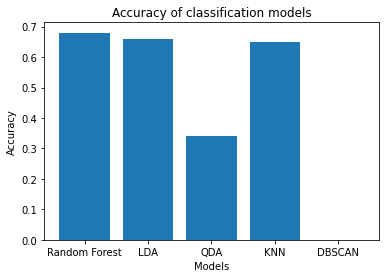

In [40]:
histogram_plot(df_model_result['Model_name'], 
               df_model_result['Accuracy'], 
               'Models',
               'Accuracy',
               'Accuracy')

## MDAPE

In [41]:
# Queremos predecir si se debe o no ir por un tipo de vía, tiene sentido calcular el mdape? cómo podríamos hacerlo
actual = [1,0.00000001,1,1,0.00000001,0.00000001]
predicted = [1,1,0.00000001,1,1,1]

mdape = np.median((np.abs(np.subtract(actual, predicted)/ actual))) * 100
print(mdape)

4999999999.999999


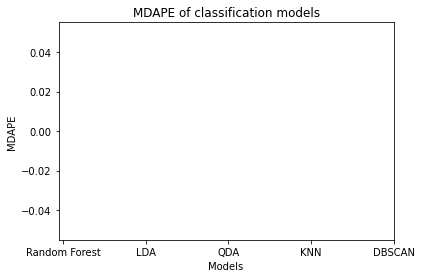

In [42]:
histogram_plot(df_model_result['Model_name'], 
               df_model_result['MDAPE'], 
               'Models',
               'MDAPE',
               'MDAPE')

## F1 score

F1	Interpretation

*   > 0.9	     Very good
*   0.8 - 0.9	 Good
*   0.5 - 0.8	 OK
*   < 0.5	     Not good



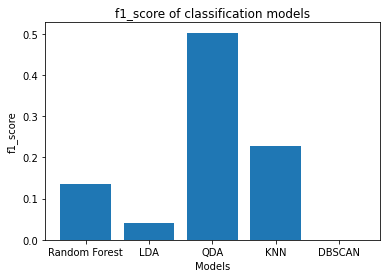

In [43]:
histogram_plot(df_model_result['Model_name'], 
               df_model_result['f1_score'], 
               'Models',
               'f1_score',
               'f1_score')

accuracy, recall, mdape

Matriz confusión para analizar:
Falso positivos: 0 clasificados como 1
Falsos negativos: 0 clasificados como 0

# Ver la distribución que siguen los datos (graficar) de los modelos anteriores

# Graficos explicando los modelos y decir que el mejor es el de QDA